In [96]:
import pandas as pd
import matplotlib.pyplot as plt 
from math import sqrt
#w tej części importuję bibliotekę pandas ze względu na to, że pozwala przyśpieszyć pracę z tabelami,
#będzie mi potrzebna biblioteka martplotlib, ona pozwala generować dwuwymiarowe wykresy i wizualizować dane,
#pd oraz plt ma służyć mi łatwiejszemu odwoływaniu się do bibliotek,
#sqrt jest potrzebne do parametrów statystycznych.

In [97]:
listings = pd.read_csv('listings.csv')
#read_csv pozwala wczytać dane z pliku, separatorem jest tu przecinek, 
#realizacja punktu 1 wytycznych,
listings
#poznajemy rozmiar danych oraz wyświetlamy je na surowo,
#realizacja punktu 2 i 3 wytycznych,

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.610940,-122.292860,Entire home/apt,333,7,36,2021-11-30,0.22,1,332,4,STR-OPLI-19-002837
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.654440,-122.336290,Entire home/apt,99,3,157,2021-09-14,1.04,2,0,8,str-opli-19-002622
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.550170,-122.319370,Private room,62,2,154,2021-10-16,1.11,8,365,6,STR-OPLI-19-003039
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.554950,-122.386630,Entire home/apt,185,2,54,2021-12-07,0.45,2,269,13,STR-OPLI-19-002182
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.556270,-122.386070,Entire home/apt,145,5,59,2021-10-15,0.49,2,202,5,STR-OPLI-19-002182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,53868263,Landing | Modern Apartment with Amazing Amenit...,263502162,Landing,Other neighborhoods,Wallingford,47.652820,-122.342210,Entire home/apt,103,30,0,NaN,NaN,26,338,0,NaN
4682,53881175,"Walkscore 96! Dedicated Parking, Rooftop Deck ...",398317720,Joanne,Central Area,Minor,47.610829,-122.314302,Entire home/apt,214,1,0,NaN,NaN,11,90,0,STR-OPLI-21-001313
4683,53893335,Serendipity Room in the Central District,258796003,Julia,Central Area,Mann,47.601991,-122.298950,Private room,25,1,0,NaN,NaN,56,64,0,STR-OPLI-21-000070
4684,53901135,Gorgeous Patio⭐️Modern Nook⭐️Long Stays🔥Full K...,374054982,Joel,Delridge,Riverview,47.544745,-122.355932,Entire home/apt,97,3,0,NaN,NaN,2,319,0,STR-OPLI-21-000982


In [98]:
listings = listings.loc[:, ['neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','availability_365','price']].copy()
#plik CSV zawiera dużo kolumn, nie wszystko wykorzystuję, więc wybieram to, co dla mnie ważne
listings.drop_duplicates(inplace=True) #czyszczę dane, staram się przez to zwrócić ramkę danych bez powtarzających się wierszy, realizacja punktu 8 wytycznych,
listings
#jak widać warto było to zrobić, ilość się zmniejszyła z 4686 na 4661, a więc o 0,5%
#realizacja punktu 6 wytycznych,

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,Madrona,Entire home/apt,7,36,0.22,332,333
1,Wallingford,Entire home/apt,3,157,1.04,0,99
2,Georgetown,Private room,2,154,1.11,365,62
3,Fairmount Park,Entire home/apt,2,54,0.45,269,185
4,Fairmount Park,Entire home/apt,5,59,0.49,202,145
...,...,...,...,...,...,...,...
4681,Wallingford,Entire home/apt,30,0,NaN,338,103
4682,Minor,Entire home/apt,1,0,NaN,90,214
4683,Mann,Private room,1,0,NaN,64,25
4684,Riverview,Entire home/apt,3,0,NaN,319,97


W projekcie opisuję zbiór jako zawierający podstawowe informacje takie jak:
a. wartości minimalne,
b. wartości maksymalne,
c. średnia. (punkt 5 wytycznych)

In [99]:
sf_houses_review = listings.groupby(['room_type']).mean()['number_of_reviews'].sort_values()
print(sf_houses_review)
#stworzyłem obiekt grupujący sf_houses_review, który zawiera dane grupowane po 2 kluczach - typu pokoju oraz ilości recenzji

room_type
Shared room         29.720000
Private room        57.237265
Entire home/apt     64.807354
Hotel room         148.333333
Name: number_of_reviews, dtype: float64


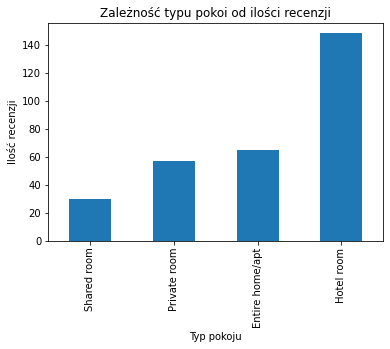

In [100]:
sf_houses_review.plot(kind="bar");
#jedna z wielu realizacji punktu 7 wytycznych,
plt.xlabel("Typ pokoju")
plt.ylabel("Ilość recenzji")
plt.title("Zależność typu pokoi od ilości recenzji");
#tworzymy wykres słupkowy, używam odwołania do biblioteki matplot oraz metod xlabel, ylabel oraz title
#robię to analogicznie jak w MATLAB, bierze to się stąd, że twórca biblioteki sugerował się interfejsem tego oprogramowania

Jak widać na załączonym wyżej obrazku, najwięcej recenzji otrzymały hotele w Waszyngtonie,
sprawdzam więc, co się dzieje w jednostce miesiąca.

In [101]:
sf_houses_review2 = listings.groupby(['room_type']).mean()['reviews_per_month'].sort_values()
print(sf_houses_review2)

room_type
Shared room        1.644857
Private room       1.839770
Entire home/apt    2.293220
Hotel room         8.643333
Name: reviews_per_month, dtype: float64


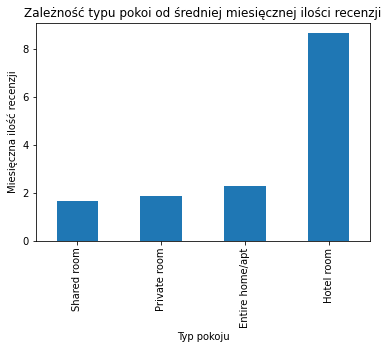

In [102]:
sf_houses_review2.plot(kind="bar");
plt.xlabel("Typ pokoju")
plt.ylabel("Miesięczna ilość recenzji")
plt.title("Zależność typu pokoi od średniej miesięcznej ilości recenzji");

W przeciągu miesiąca średnia ilość recenzji dla hoteli jest jeszcze bardziej miażdząca dla pozostałych typów,
jest to spowodowane tym, że pozytywne recenzje nakłaniają ludzi do korzystania z hoteli,
kolejne osoby je odwiedzają, piszą recenzje, co czytają następni klienci i tak się to cały czas będzie zwiększać.

In [103]:
count=listings['neighbourhood'].value_counts()
count

Belltown               286
Broadway               280
University District    180
Fremont                167
Wallingford            154
                      ... 
Windermere               7
Holly Park               5
Meadowbrook              5
Harbor Island            1
Industrial District      1
Name: neighbourhood, Length: 89, dtype: int64

Sprawdziłem też, jakich osiedli w Waszyngtonie jest najwięcej wśród moich danych,
okazało się, że zdecydowanie najwięcej ma Belltown, sprawdziłem w internecie, że rzeczywiście jest to osiedle mieszkaniowe,
najmniej jest na wyspie Harbor oraz w Industrial District, są to dość małe jednostki administracyjne, około kilometr kwadratowy - źródło: https://en.wikipedia.org/wiki/Harbor_Island,_Seattle.

In [104]:
listings.room_type.value_counts()
sf_houses = listings.groupby(['room_type']).mean()['minimum_nights'].sort_values()
print(sf_houses)

room_type
Hotel room          1.000000
Shared room         6.800000
Entire home/apt    13.458053
Private room       14.711796
Name: minimum_nights, dtype: float64


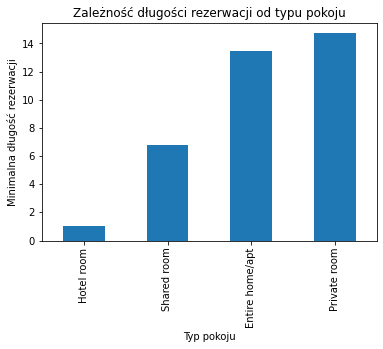

In [105]:
sf_houses.plot(kind="bar");
plt.xlabel("Typ pokoju")
plt.ylabel("Minimalna długość rezerwacji")
plt.title("Zależność długości rezerwacji od typu pokoju");

Określiłem też, na jak długo są rezerwowane przestrzenie mieszkalne, 
w Waszyngtonie hotele są wynajmowane na 1 noc, co jest sensowne i potwierdza prawidłowość moich obliczeń, 
natomiast prywatne pokoje na około 2 tygodnie.

In [106]:
sf_listings_avail = listings.groupby(['neighbourhood']).mean()['availability_365'].sort_values()
sf_listings_avail

neighbourhood
Montlake                  101.343284
South Beacon Hill         102.937500
Holly Park                128.000000
High Point                142.600000
North Delridge            142.605263
                             ...    
Pike-Market               256.810811
Highland Park             281.652174
Eastlake                  293.298246
International District    311.360000
Harbor Island             364.000000
Name: availability_365, Length: 89, dtype: float64

Określiłem dostępność pokoi w ciągu 365 dni roku i największa jest ona w miejscach niepopularnych,
jak wspomniana wcześniej wyspa i dzielnica przemysłowa.

In [107]:
listings.groupby(['neighbourhood']).mean()['price'].sort_values()

neighbourhood
Holly Park                 52.400000
Roxhill                    64.500000
Highland Park              73.304348
North College Park         76.727273
International District     90.480000
                             ...    
Sunset Hill               216.225806
Broadview                 234.217391
Briarcliff                244.545455
West Queen Anne           253.318182
Harrison/Denny-Blaine     413.380952
Name: price, Length: 89, dtype: float64

Pokazuję na koniec ceny w różnych jednostkach administracyjnych, wynika z nich, że bardzo drogo jest choćby w West Queen Anne.
Rzeczywiście tak jest, zgodnie z trulia.com, czynsz tam wynosi nawet 5 tysięcy dolarów na miesiąc - źródło: https://www.trulia.com/n/wa/seattle/west-queen-anne/87007/

In [108]:
df = pd.DataFrame()
df['wolne_pokoje'] = sf_listings_avail
df['dostepnosc'] = count
df
#w tym fragmencie nadaję swoje nazwy dwóm kolumnom odpowiedzialnym za dostępność osiedli oraz ilość wolnych pokoi.

,wolne_pokoje,dostepnosc
neighbourhood,,
Montlake,101.343284,67
South Beacon Hill,102.937500,32
Holly Park,128.000000,5
High Point,142.600000,15
North Delridge,142.605263,38
...,...,...
Pike-Market,256.810811,74
Highland Park,281.652174,23
Eastlake,293.298246,57


Jak widać na załączonym obrazku, im więcej pokoi, tym dostępność osiedli spada ze względu na to, że są one w gorszej lokalizacji.

In [109]:
n = len(df['wolne_pokoje'])
vr = pd.DataFrame(df[:])
vr['xy'] = df['wolne_pokoje'] * df['dostepnosc']
vr['x2'] = df['wolne_pokoje'] * df['wolne_pokoje']
vr['y2'] = df['dostepnosc'] * df['dostepnosc']
vr.loc['Σ'] = vr.sum()
def wsp_korelacji(n, ΣX, ΣY, Σxy, Σx2, Σy2):
    return ( (n * Σxy - ΣX * ΣY) /
             (sqrt((n * Σx2 - ΣX**2) * (n * Σy2 - ΣY**2))) )

r = wsp_korelacji(n, vr['wolne_pokoje']['Σ'], vr['dostepnosc']['Σ'], vr['xy']['Σ'], vr['x2']['Σ'], vr['y2']['Σ'])
print("r = ", r)
#realizacja punktu 10

r =  -0.02709834834206344


Współczynnik korelacji jest minusowy, a więc potwierdza się, że wraz ze wzrostem dostępności, maleje ilość wolnych pokoi.

In [110]:
def srednia(zbior):
    return float(zbior.sum()) / len(zbior)
#realizacja punktu 4 wytycznych

Mx = srednia(df['wolne_pokoje'])
My = srednia(df['dostepnosc'])

def odchylenie(zbior, srednia):
    licznik = 0
    for elementy in zbior:
        licznik += (elementy - srednia) * (elementy - srednia)
    return sqrt(licznik / (len(zbior) - 1))

Sx = odchylenie(df['wolne_pokoje'], Mx)
Sy = odchylenie(df['dostepnosc'], My)

print("Sx: ", Sx)
print("Sy: ", Sy)

Sx:  41.2156940797802
Sy:  51.204443615425326


Odchylenie standardowe określa rozproszenie poszczególnych wartości wokół wartości średniej. Skoro jest większe dla drugiej wartości, to dostępność jest bardziej zróżnicowana niż ilość wolnych pokoi.

In [111]:
df = pd.DataFrame(listings)
df
df.corr().style.background_gradient(cmap="Blues")

,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
minimum_nights,1.000000,-0.196119,-0.405428,0.173186,0.054381
number_of_reviews,-0.196119,1.000000,0.544748,-0.111483,-0.104704
reviews_per_month,-0.405428,0.544748,1.000000,-0.101091,-0.120010
availability_365,0.173186,-0.111483,-0.101091,1.000000,0.072100
price,0.054381,-0.104704,-0.120010,0.072100,1.000000


Jak widać na załączonym obrazku, wyraźnie dobrze są skorelowane ze sobą tylko dwie zmienne - ilość recenzji oraz recenzje na miesiąc, pozostałe mają wartości współczynników bliskie zero.